In [2]:
"""Preprocessing Neural Spike Data."""

'Preprocessing Neural Spike Data.'

# Output of pipeline for '/neuro/recordings/2018-05-31_15-43-39'

In [72]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os

import numpy as np

import nrtk.io
import nrtk.vis
import nrtk.sort
importlib.reload(nrtk.io)
importlib.reload(nrtk.vis)
importlib.reload(nrtk.sort)

import warnings
warnings.filterwarnings("ignore")

OUTPUT_DIR = '/scratch/users/nmiolane/sommet/output'

# Load Data: Positions and signals

In [73]:
data_path = os.path.join(OUTPUT_DIR, 'load_data.npy')
data = np.load(data_path).item()
positions = data['positions']
signals = data['signals']

_, n_time_steps_in_position = positions.shape
_, n_time_steps_in_signal = signals.shape

assert n_time_steps_in_signal == 512 * n_time_steps_in_position

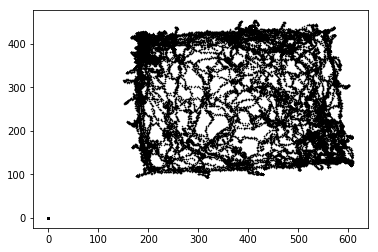

In [74]:
plt.plot(positions[0], positions[1], 'k.', ms=1)
plt.show()

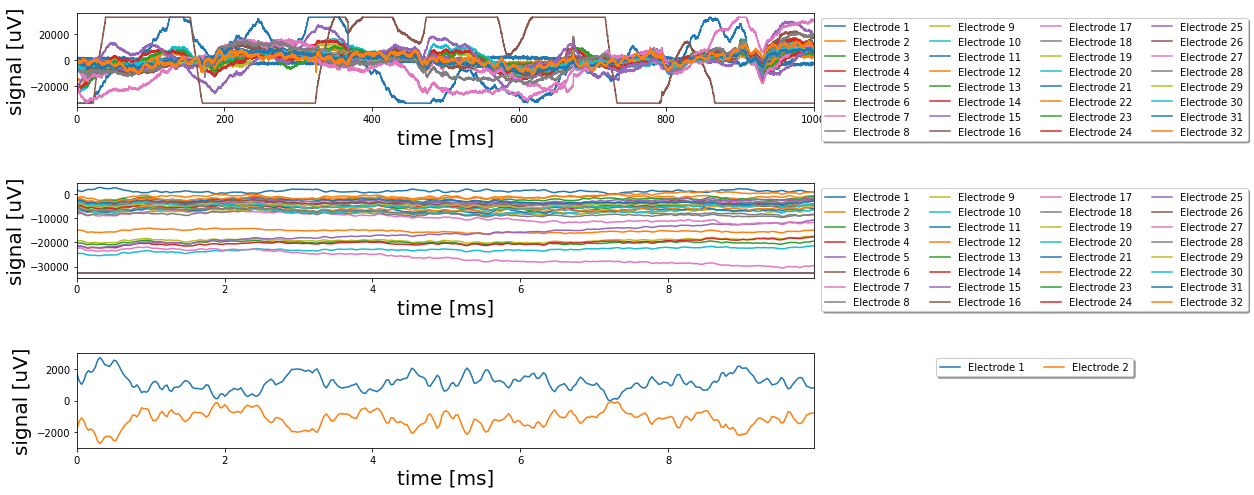

In [78]:
importlib.reload(nrtk.vis)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(22, 8))
fig.subplots_adjust(hspace=0.8)

ax = axes[0]
ax = nrtk.vis.plot_signal_electrodes(ax, signals)

ax = axes[1]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01)

ax = axes[2]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01, electrodes_ids=[0, 1])

# Filter Signals

In [79]:
signals_path = os.path.join(OUTPUT_DIR, 'filter_signals.npy')
signals = np.load(signals_path)

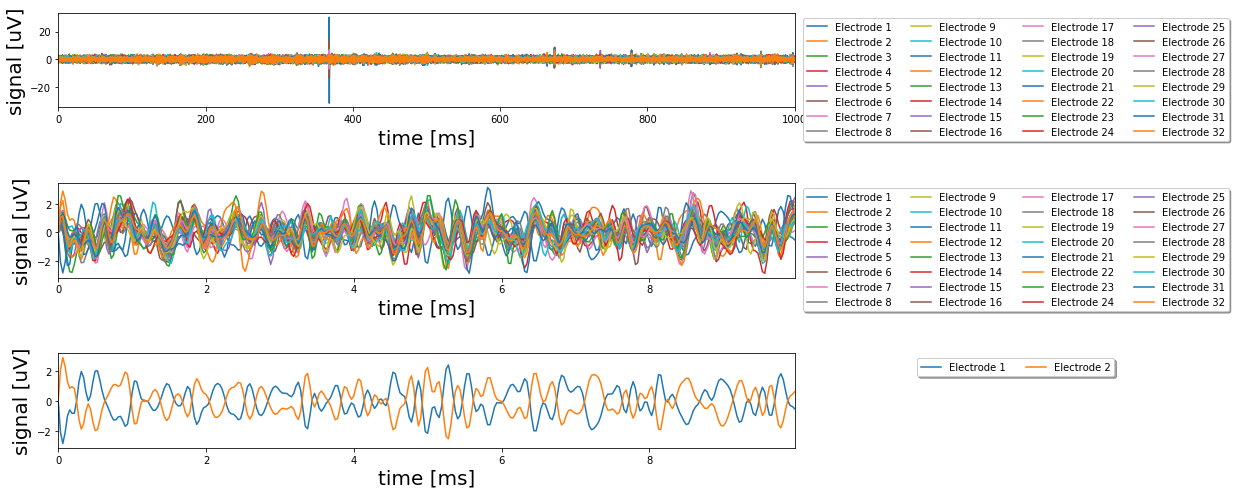

In [80]:
importlib.reload(nrtk.vis)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(22, 8))
fig.subplots_adjust(hspace=0.8)

ax = axes[0]
ax = nrtk.vis.plot_signal_electrodes(ax, signals)

ax = axes[1]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01)

ax = axes[2]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01, electrodes_ids=[0, 1])

## Waterfall view

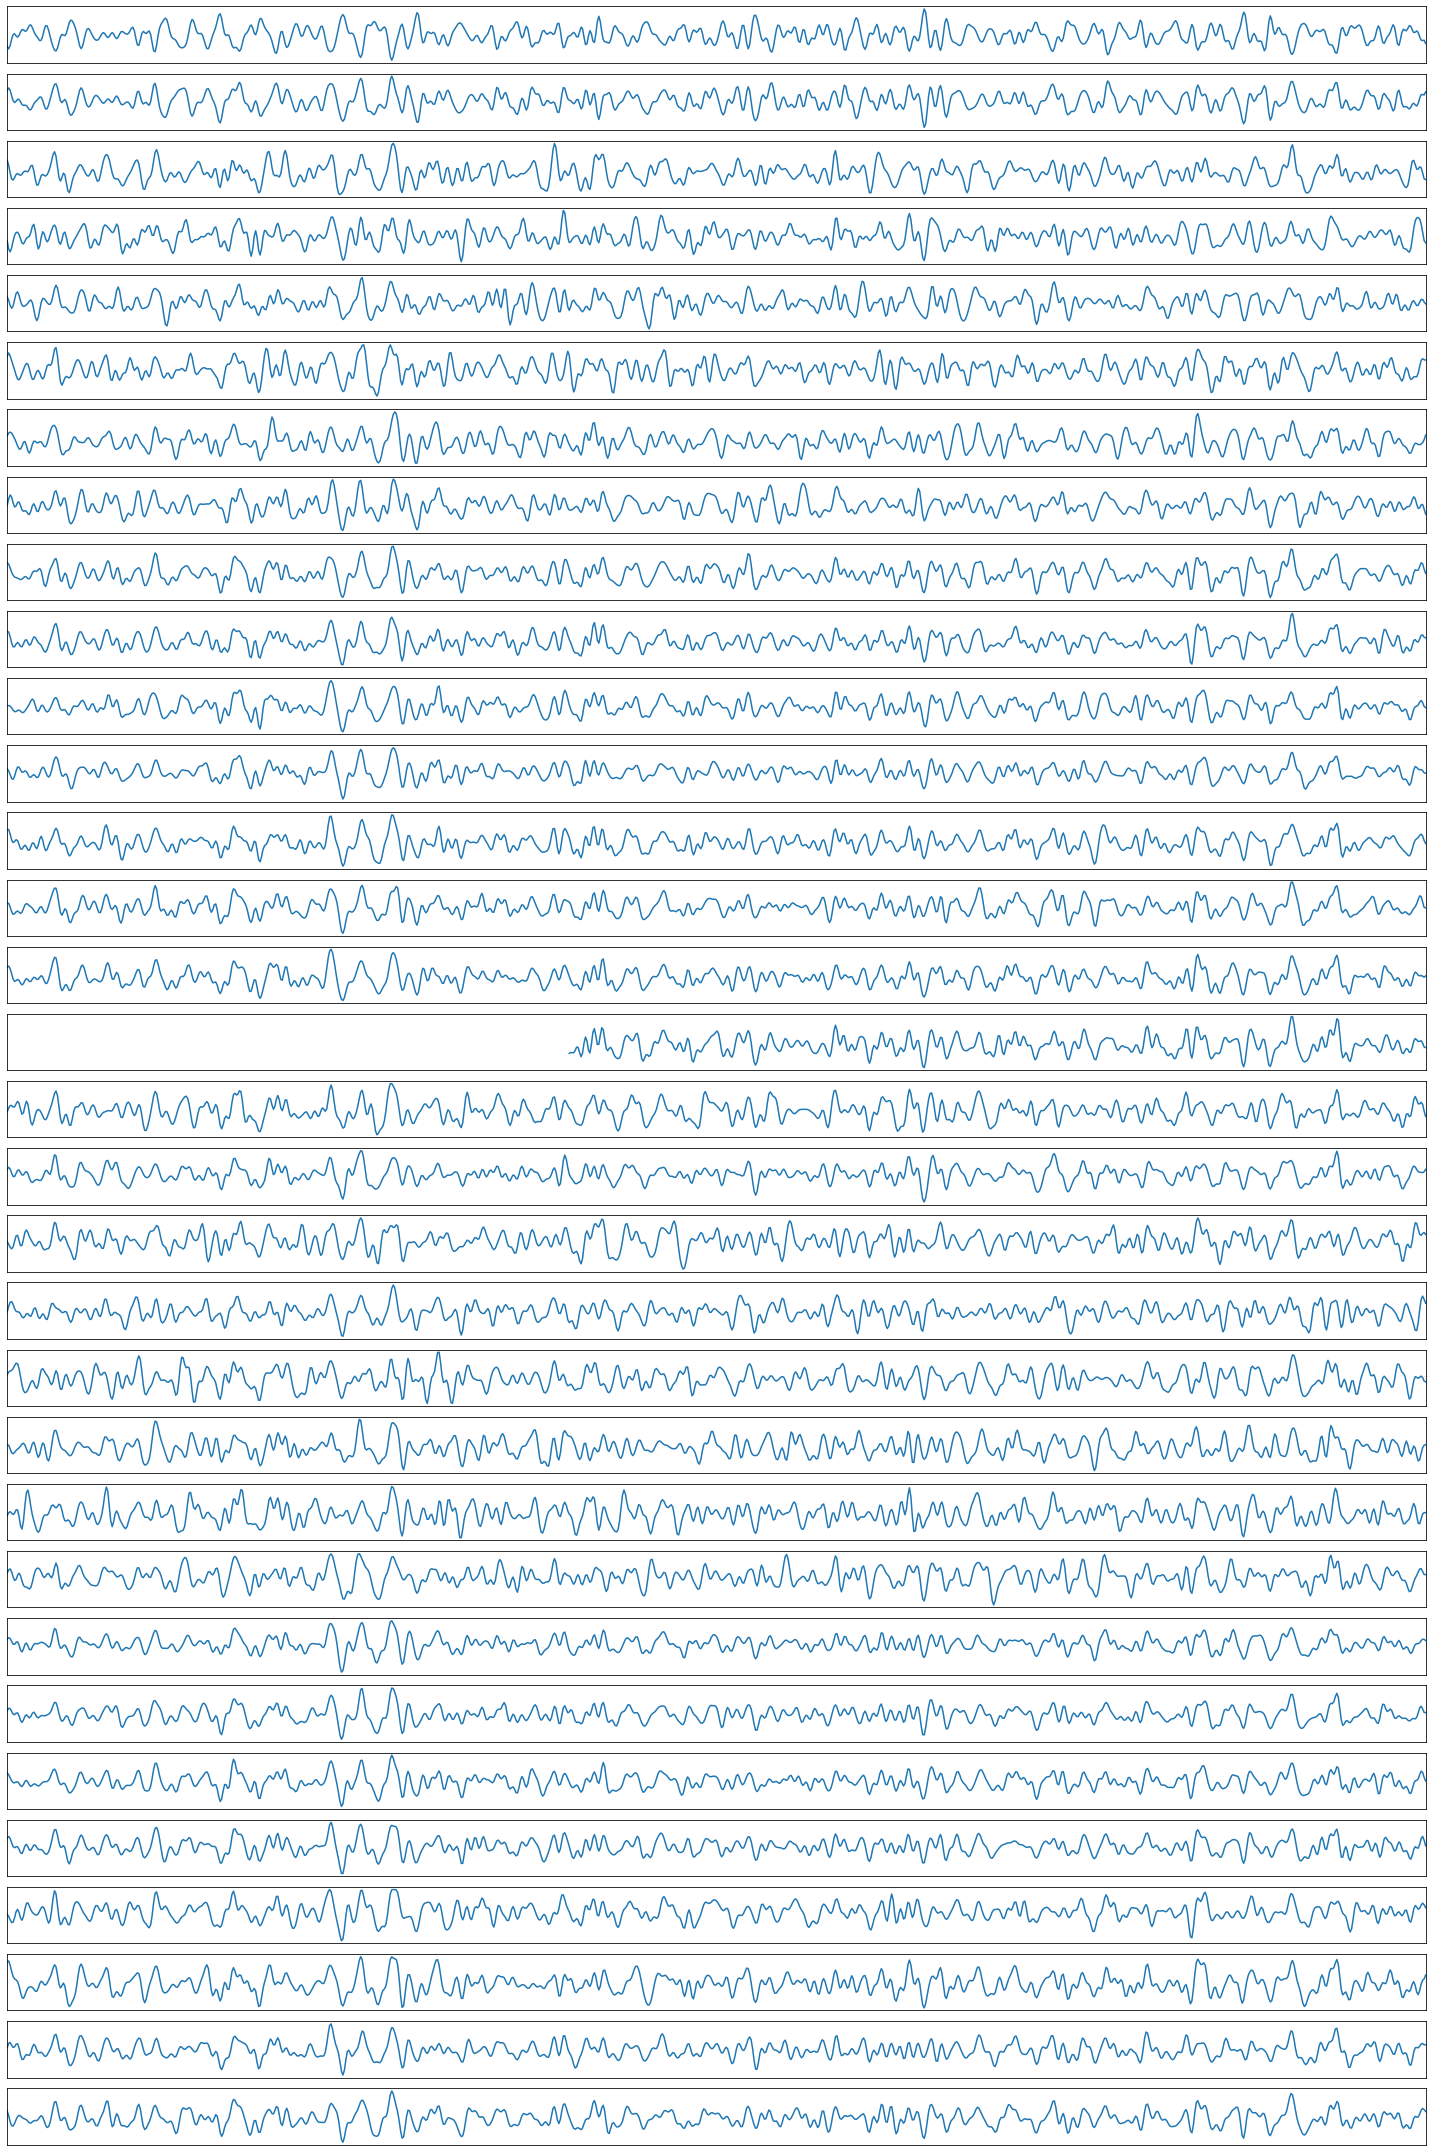

In [65]:
importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape

fig, axes = plt.subplots(nrows=n_electrodes, ncols=1, figsize=(20, 30))
for i in range(n_electrodes):
    ax = axes[i]
    nrtk.vis.plot_signal(ax, signals[i], label='Electrode %d' % (i+1), t_min=1., t_max=1.03)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()

## Correlations

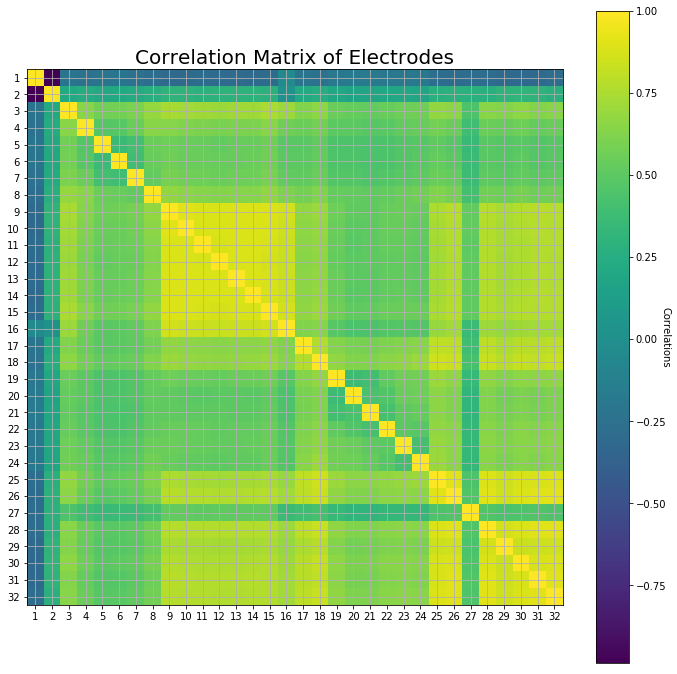

In [10]:
importlib.reload(nrtk.vis)

fig, ax = plt.subplots(figsize=(12, 12))
ax = nrtk.vis.plot_correlation(fig, ax, signals)

# Extract Spikes

## Explore peaks (re-running)

In [40]:
peaks_ids = nrtk.sort.extract_peaks_ids(signals)

Electrode 1. Found 19104 peaks over 24961536 recorded data.
Electrode 2. Found 18766 peaks over 24961536 recorded data.
Electrode 3. Found 16090 peaks over 24961536 recorded data.
Electrode 4. Found 18984 peaks over 24961536 recorded data.
Electrode 5. Found 26243 peaks over 24961536 recorded data.
Electrode 6. Found 24168 peaks over 24961536 recorded data.
Electrode 7. Found 20096 peaks over 24961536 recorded data.
Electrode 8. Found 14595 peaks over 24961536 recorded data.
Electrode 9. Found 11295 peaks over 24961536 recorded data.
Electrode 10. Found 11650 peaks over 24961536 recorded data.
Electrode 11. Found 11504 peaks over 24961536 recorded data.
Electrode 12. Found 12474 peaks over 24961536 recorded data.
Electrode 13. Found 11933 peaks over 24961536 recorded data.
Electrode 14. Found 12393 peaks over 24961536 recorded data.
Electrode 15. Found 11030 peaks over 24961536 recorded data.
Electrode 16. Found 3043 peaks over 24961536 recorded data.
Electrode 17. Found 33045 peaks ov

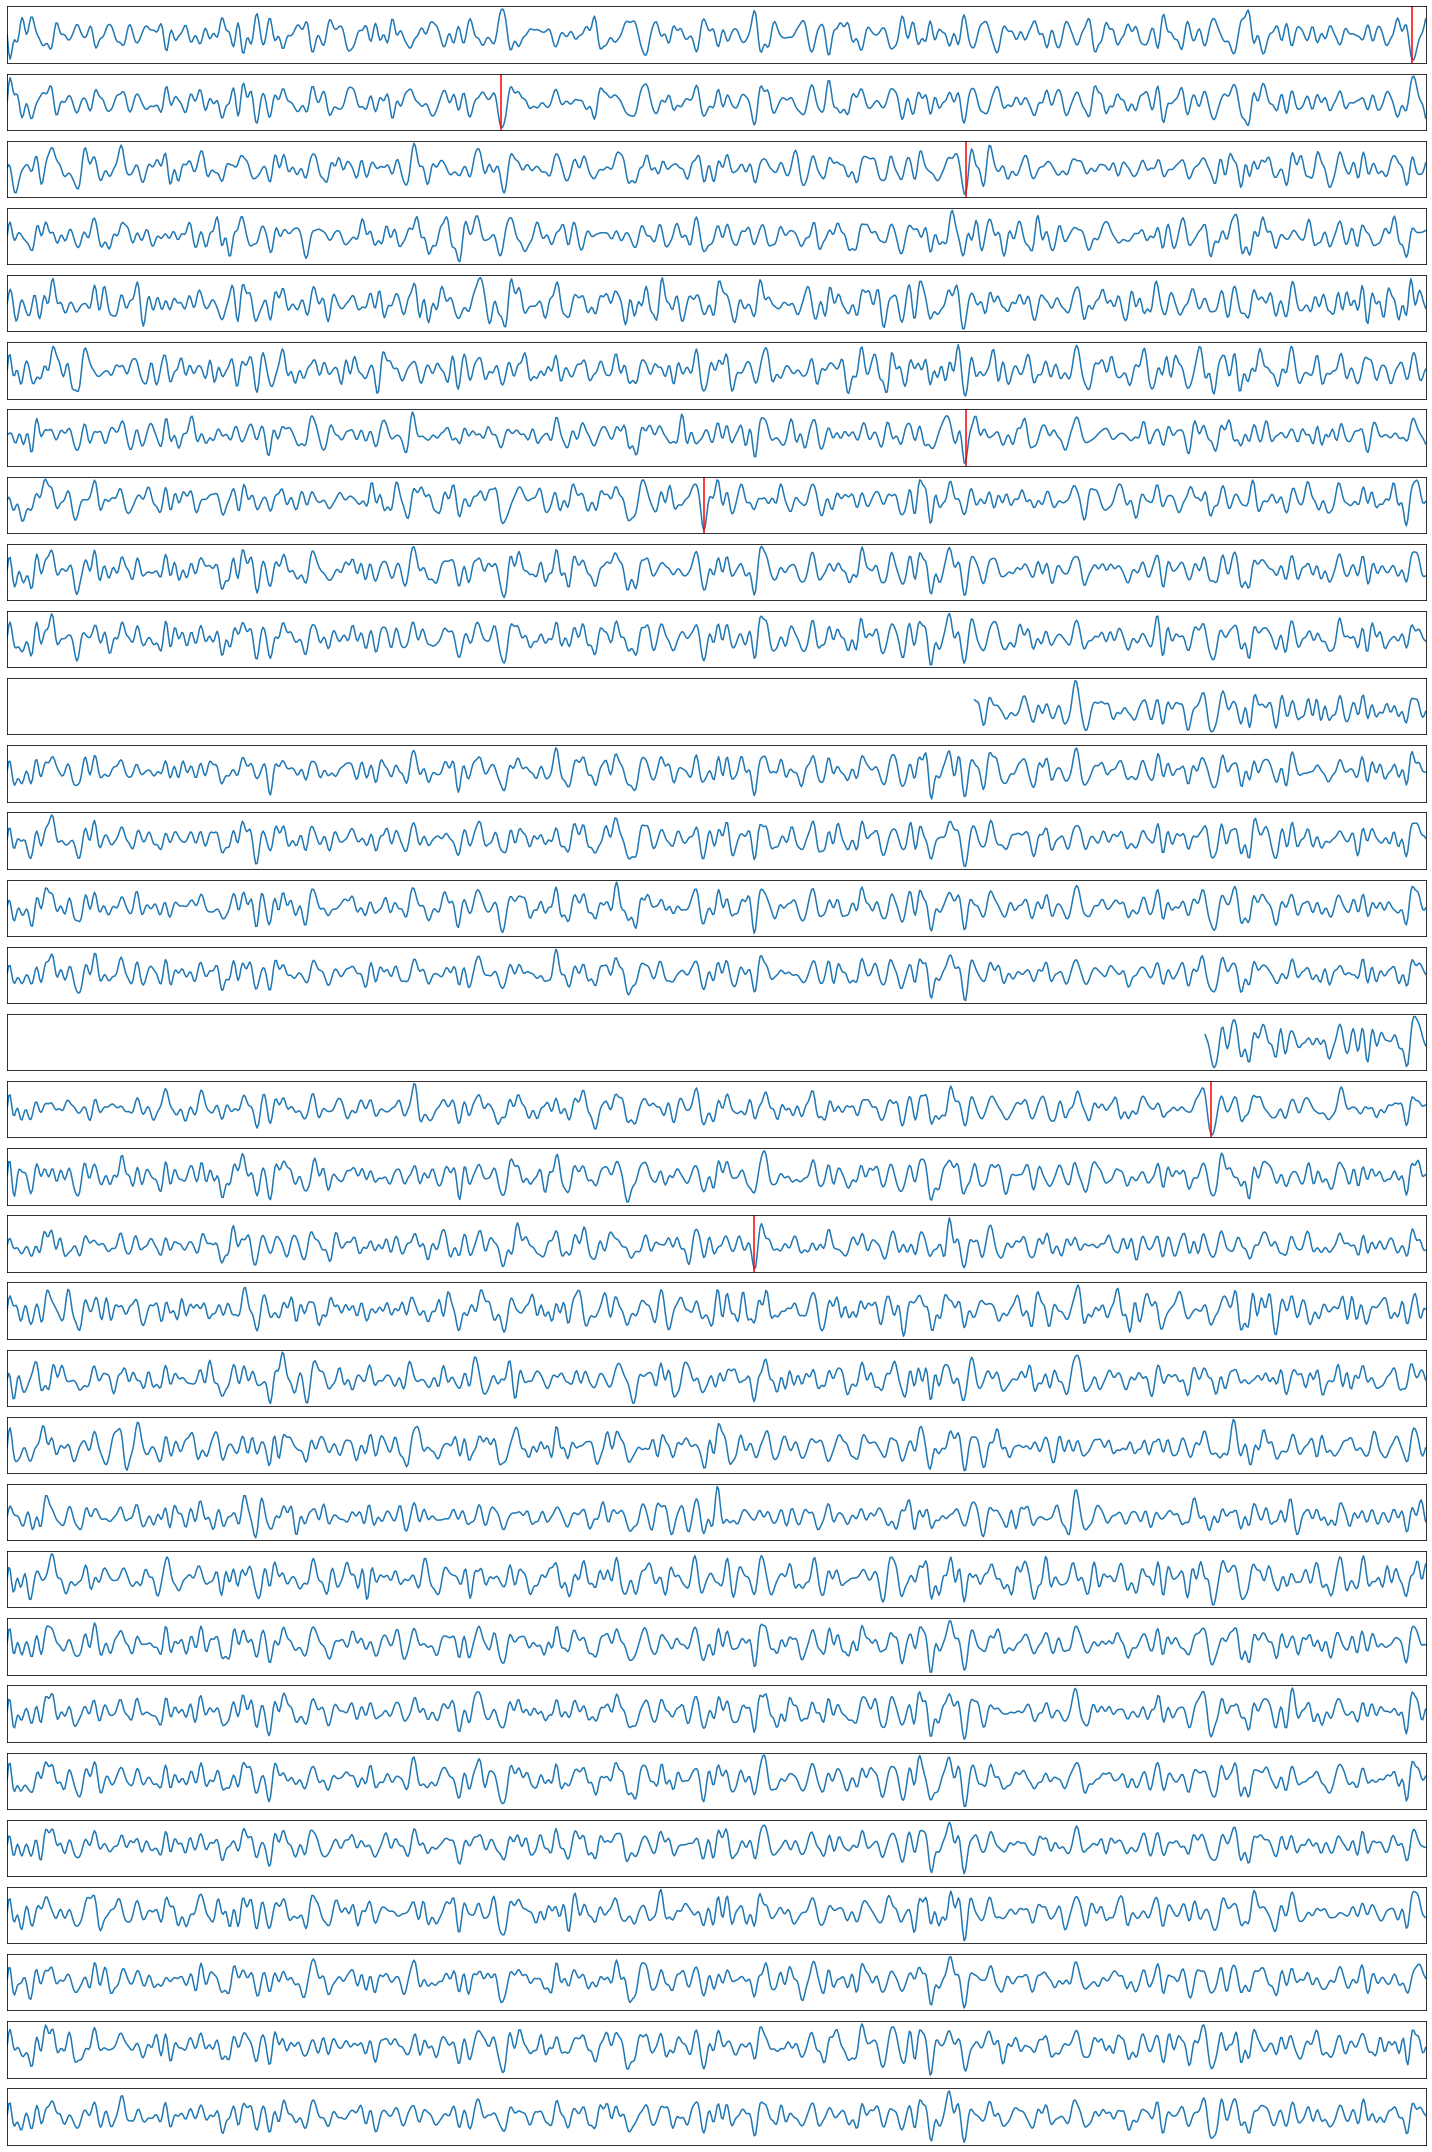

In [66]:
importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape
time = nrtk.vis.get_time(signals)

fig, axes = plt.subplots(nrows=n_electrodes, ncols=1, figsize=(20, 30))
for electrode_id in range(n_electrodes):
    ax = axes[electrode_id]
    nrtk.vis.plot_signal(
        ax, signals[electrode_id], label='Electrode %d' % (electrode_id+1), 
        t_min=0., t_max=0.03)
    peak_0_msecs = 1000 * time[peaks_ids[electrode_id][0]]
    peak_1_msecs = 1000 * time[peaks_ids[electrode_id][1]]
    ax.axvline(x=peak_0_msecs, color='red')
    ax.axvline(x=peak_1_msecs, color='red')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()

## PCA and KMeans for Spike Sorting

In [68]:
pca_kmeans_path = os.path.join(OUTPUT_DIR, 'extract_spikes.npy')
pca_kmeans = np.load(pca_kmeans_path).item()

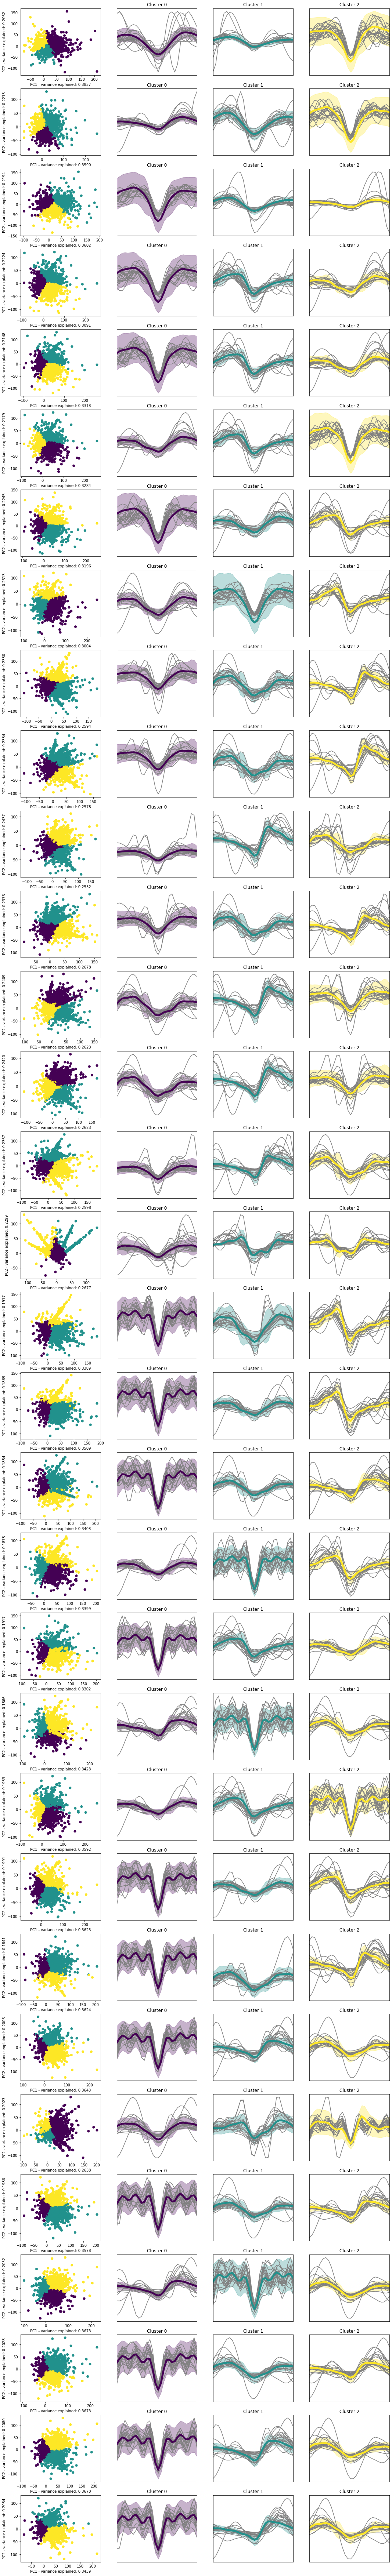

In [71]:
importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape

fig, axes = plt.subplots(nrows=32, ncols=4, figsize=(18, 4 * n_electrodes))
for electrode_id in range(n_electrodes):
    pca_kmeans_electrode = pca_kmeans[electrode_id]
    n_clusters = len(pca_kmeans_electrode['centers'])
    
    ax = axes[electrode_id, 0]
    ax = nrtk.vis.plot_pca_kmeans(ax, pca_kmeans_electrode)

    for cluster_id in range(n_clusters):
        ax = axes[electrode_id, cluster_id+1]
        ax = nrtk.vis.plot_centers(ax, pca_kmeans_electrode, center_id=cluster_id)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)